In [2]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.0/10.6 MB 495.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 491.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 525.1 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.6 MB 547.6 kB/s eta 0:00:20
    --------------------------------------- 0.1/10.6 MB 500.5 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.6 MB 482.7 kB/s eta 

In [2]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:23
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:24
   ---------------------------------------- 0.1/24.8 MB 950.9 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 952.6 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 981.9 kB/s eta 0:00:26
   ---------------------------------------- 0.3/24.8 MB 1.0 MB/s eta 0:00:25
   ---------------------------------------- 0.3/24.8 MB 842.9 kB/s eta 0:00:30
    --------------------------------------- 0.3/24.8 MB 873.8 kB/s eta 0:00:29
    --------------------------------------- 0.4/24.8 MB 882.8 kB/s eta 0:00:28
    --------------------------------------- 0.4/24.8 MB 881.6 kB/s eta 0:00:28
    --------------------------------------- 0.5/24.8 MB 901.1 kB/s eta 0:

In [18]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import sklearn
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import random
import shutil
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.applications import InceptionResNetV2, InceptionV3
#from tensorflow.keras.applications import preprocess_input

In [ ]:
#ROOT_DIR='/kaggle/input/eurosat-dataset/EuroSAT'
#os.listdir(ROOT_DIR)

In [9]:
def load_images_from_directory(ROOT_DIR, normalize_rgb=False):
    images=[]
    labels=[]
    image_names=[]
    i=0
    for dir_name in os.listdir(ROOT_DIR):
        if os.path.isdir(os.path.join(ROOT_DIR,dir_name)):
            class_name = dir_name.split("\\")[-1]
            print(class_name)
            sub_dir_name = os.path.join(ROOT_DIR,dir_name)
            print(sub_dir_name)

            if os.path.isdir(sub_dir_name):    
                for img in os.listdir(sub_dir_name):
                    if img.endswith(('.jpg', '.jpeg', '.png')):                    
                        image_read = cv2.imread(os.path.join(ROOT_DIR,dir_name,img))
                        #print("{} image shape is : {}".format(img, image_read.shape))
                        img_cvt_color = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
                        
                        image_names.append(img)
                        images.append(img_cvt_color)
                        labels.append(class_name)
#        i+=1
#        if i==1:
#            break
    if normalize_rgb:
        return np.array(images)/255, np.column_stack((np.array(labels), np.array(image_names)))    
    else: 
        return np.array(images), np.column_stack((np.array(labels), np.array(image_names)))

In [10]:
def split_organize_data(root_dir, train_dir, test_dir, split_ratio=0.8):
    print("train dir : ", train_dir)
    print("test dir : ", test_dir)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    for class_folder in os.listdir(root_dir):
        class_source_dir=os.path.join(root_dir, class_folder)
        if not os.path.isdir(class_source_dir):
            continue
        
        train_class_dir = os.path.join(train_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        
        files = os.listdir(class_source_dir)
        
        random.shuffle(files)
        
        num_train = int(len(files)*split_ratio)
        num_test = len(files) - num_train
        
        train_files = files[:num_train]
        test_files = files[num_train:]
        
        print(train_class_dir)
        for file in train_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(train_class_dir, file))
        print(test_class_dir)
        for file in test_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(test_class_dir, file))
        

In [11]:
root_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\EuroSAT_RGB'
train_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\train'
test_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\test'
#root_dir="/kaggle/input/eurosat-dataset/EuroSAT"
#train_dir="/kaggle/working/eurosat-dataset/train"
#test_dir="/kaggle/working/eurosat-dataset/test"

In [38]:
split_organize_data(root_dir, train_dir, test_dir, 0.8)

train dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train
test dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\HerbaceousVegetation
C:\Users\Ab

In [8]:
# #Using Functional API, building RESNET-34

# #Need to make atleast 2 mehtods , one for final architecture, and one for residual unit
# def residual_block(inputs, filters , strides):
    
#     shortcut=inputs
#     print(shortcut.shape)
#     if strides!=1 or shortcut.shape[-1] != filters[-1]:
#         shortcut = tf.keras.layers.Conv2D(filters[0], 1, strides=strides, padding='same')(shortcut)
#         shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
#     #First block 
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=strides, padding="same")(inputs)
#     x=tf.keras.layers.BatchNormalization()(x)
#     x=tf.keras.layers.Activation("relu")(x)
    
#     #Second Block
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=(1,1), padding="same")(x)
#     x=tf.keras.layers.BatchNormalization()(x)
    
#     #Third Block Skip Layer
#     x=tf.keras.layers.Add()([shortcut, x])
#     x=tf.keras.layers.Activation("relu")(x)
    
#     return x
    
# def stage(x, filters, block, strides):
#     for i in range(block):
#         if i == 0 :
#             x=residual_block(x, filters, strides)
#         else:
#             x=residual_block(x, filters, strides=1)
#     return x

# def build_resnet_34(input_shape=(64,64,3), num_classes=10 ):
#     inputs = tf.keras.layers.Input(shape=input_shape)
    
#     #Starting convolutional layers of kernel 7*7 and stride 2
#     x=tf.keras.layers.Conv2D(64, kernel_size=7, padding="same", strides=2, activation="relu")(inputs)
#     x=tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same")(x)
    
#     #Residual Blocks
#     x=stage(x,filters=[64],block=3, strides=1 )
#     x=stage(x,filters=[128],block=4, strides=2 )
#     x=stage(x,filters=[256],block=6, strides=2 )
#     x=stage(x,filters=[512],block=3, strides=1 )
    
#     #Final Output Layers
#     x=tf.keras.layers.GlobalAveragePooling2D()(x)
#     x=tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal")(x)
#     outputs= tf.keras.layers.Dense(num_classes, activation="softmax")(x)
#     model = tf.keras.Model(inputs, outputs)
#     return model


In [9]:
# model = build_resnet_34(input_shape=(64,64,3), num_classes=10) 

(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 512)
(None, 4, 4, 512)


In [5]:
#Making Resnet34 using class ResidualUnit to check the performance 
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.filters=filters
        self.strides=strides
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides > 1 :
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                   padding="same", use_bias=False),
                keras.layers.BatchNormalization()
            ]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'filters': self.filters,
            'strides': self.strides,
            'activation': keras.activations.serialize(self.activation)
        })
        return config

In [6]:
# ##Resnet Model using Sequential API Keras

# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(64, 7, strides=2, 
#                               input_shape=[64,64,3],
#                              padding="same", use_bias=False))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="Same"))
# prev_filters=64
# for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
#     strides=1 if filters==prev_filters else 2
#     model.add(ResidualUnit(filters, strides=strides))
#     prev_filters = filters
# model.add(keras.layers.GlobalAvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))

base_model.trainable = False

inputs = keras.Input(shape=(75, 75, 3))

x = base_model(inputs, training=False)

# Add custom classification head
#x = base_model.output
#x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="same", data_format="channels_last")(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x) 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x) 
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)


87924736/87910968 [==============================] - 36s 0us/step


In [45]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from datetime import datetime
# Create a TensorBoard callback to log gradients
log_dir = "C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\logs\\gradient\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
model.compile(optimizer=Nadam(learning_rate=0.00005,clipnorm=1.0), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [21]:
model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 75, 75, 3)]       0         Y          
                                                                            
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  N          
                                                                            
 global_average_pooling2d (G  (None, 2048)             0         Y          
 lobalAveragePooling2D)                                                     
                                                                            
 dense (Dense)               (None, 512)               1049088   Y          
                                                                            
 dropout (Dropout)           (None, 512)               0         Y          
                                                             

In [22]:
#### Setup Image Data Generator with augmentation

augment_data_generator=ImageDataGenerator(rotation_range=180, 
                                          width_shift_range=0.2, 
                                          height_shift_range=0.2, 
                                          rescale=1./255, 
                                          shear_range=0.3, 
                                          zoom_range=0.3, 
                                          horizontal_flip=True, 
                                          vertical_flip=True,
                                          validation_split=0.2,
                                          brightness_range=(0.7,1.3),
                                         data_format="channels_last")

#data_dir = '/kaggle/working/eurosat-dataset/train'

train_data_generator = augment_data_generator.flow_from_directory(
    train_dir, 
    target_size=(75,75),
    color_mode='rgb',
    batch_size=24,
    class_mode='sparse',
    subset='training'
)

validation_data_generator = augment_data_generator.flow_from_directory(
    train_dir, 
    target_size=(75,75),
    color_mode='rgb',
    batch_size=24,
    class_mode='sparse',
    subset='validation'
)

Found 17280 images belonging to 10 classes.
Found 4320 images belonging to 10 classes.


In [26]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("inceptionv3_75x75_transfer_learning.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

In [27]:
history=model.fit(train_data_generator, 
                  epochs=50, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
720/720 [==============================] - 54s 70ms/step - loss: 0.7277 - accuracy: 0.7649 - val_loss: 0.6375 - val_accuracy: 0.7870
Epoch 2/50
720/720 [==============================] - 43s 59ms/step - loss: 0.7030 - accuracy: 0.7683 - val_loss: 0.6437 - val_accuracy: 0.7861
Epoch 3/50
720/720 [==============================] - 41s 57ms/step - loss: 0.7003 - accuracy: 0.7729 - val_loss: 0.6554 - val_accuracy: 0.7942
Epoch 4/50
720/720 [==============================] - 41s 57ms/step - loss: 0.6887 - accuracy: 0.7723 - val_loss: 0.6465 - val_accuracy: 0.7884
Epoch 5/50
720/720 [==============================] - 42s 59ms/step - loss: 0.6950 - accuracy: 0.7683 - val_loss: 0.6344 - val_accuracy: 0.7944
Epoch 6/50
720/720 [==============================] - 42s 58ms/step - loss: 0.6817 - accuracy: 0.7733 - val_loss: 0.6372 - val_accuracy: 0.7852
Epoch 7/50
720/720 [==============================] - 45s 62ms/step - loss: 0.6835 - accuracy: 0.7738 - val_loss: 0.6324 - val_accuracy:

In [62]:
del os.environ['TENSORBOARD_BINARY']

In [61]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to start
'C:\\Users\\Abhi\\AppData\\Roaming\\Python\\Python310\\site-
packages\\tensorboard' (set by the `TENSORBOARD_BINARY` environment
variable): [WinError 5] Access is denied

In [28]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [31]:
for layer in model.layers[:]:
    layer.trainable = True



In [32]:
#base_model.trainable = True
model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 75, 75, 3)]       0         Y          
                                                                            
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  Y          
                                                                            
 global_average_pooling2d (G  (None, 2048)             0         Y          
 lobalAveragePooling2D)                                                     
                                                                            
 dense (Dense)               (None, 512)               1049088   Y          
                                                                            
 dropout (Dropout)           (None, 512)               0         Y          
                                                             

In [33]:
model.compile(optimizer=Nadam(learning_rate=0.000001,clipnorm=1.0), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [34]:
checkpoint_cb1 = keras.callbacks.ModelCheckpoint("inception_v3_transfer_learning.h5", save_best_only=True)
early_stopping_cb1 = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history=model.fit(train_data_generator, 
                  epochs=50, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb1, early_stopping_cb1])

Epoch 1/50
720/720 [==============================] - 117s 137ms/step - loss: 0.6374 - accuracy: 0.7921 - val_loss: 0.5392 - val_accuracy: 0.8201
Epoch 2/50
720/720 [==============================] - 97s 135ms/step - loss: 0.5808 - accuracy: 0.8112 - val_loss: 0.4967 - val_accuracy: 0.8289
Epoch 3/50
720/720 [==============================] - 101s 140ms/step - loss: 0.5369 - accuracy: 0.8245 - val_loss: 0.4752 - val_accuracy: 0.8500
Epoch 4/50
720/720 [==============================] - 105s 146ms/step - loss: 0.5168 - accuracy: 0.8346 - val_loss: 0.4452 - val_accuracy: 0.8537
Epoch 5/50
720/720 [==============================] - 106s 147ms/step - loss: 0.4784 - accuracy: 0.8421 - val_loss: 0.4395 - val_accuracy: 0.8549
Epoch 6/50
720/720 [==============================] - 105s 146ms/step - loss: 0.4515 - accuracy: 0.8555 - val_loss: 0.4155 - val_accuracy: 0.8634
Epoch 7/50
720/720 [==============================] - 105s 146ms/step - loss: 0.4568 - accuracy: 0.8571 - val_loss: 0.4013 - 

In [35]:
def create_graph_for_nn_training(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

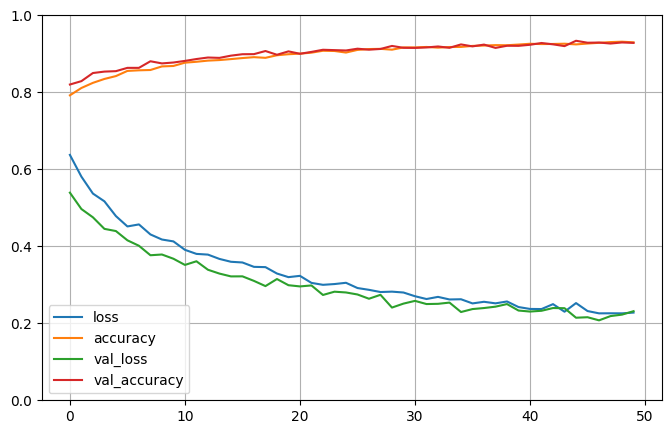

In [36]:
create_graph_for_nn_training(history)

In [64]:
model.evaluate()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [37]:
#test_dir='/kaggle/working/eurosat-dataset/test'
test_data_generator = augment_data_generator.flow_from_directory(
    test_dir, 
    target_size=(75,75),
    color_mode='rgb',
    batch_size=32,
    class_mode='sparse',
    interpolation="lanczos",
    shuffle=False
)

Found 5400 images belonging to 10 classes.


In [38]:
batch_size=32
test_data_generator.reset() 
y_pred = model.predict(test_data_generator)#,steps= math.ceil(test_data_generator.samples//batch_size),workers=8)

y_pred.shape

(5400, 10)

In [39]:
predicted_labels = np.argmax(y_pred, axis=1)

# Compare with ground truth labels
true_labels = test_data_generator.classes

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9374074074074074


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

def precision_recall_f1_value(actual_value, predicted_value, classes, average_type='binary'):
    precision_value = precision_score(actual_value, predicted_value, average=average_type)
    recall_value = recall_score(actual_value, predicted_value, average=average_type)
    f1 = f1_score(actual_value, predicted_value, average=average_type)
    conf_matrix = confusion_matrix(actual_value, predicted_value)
    print("Precision Value : " + str(precision_value))
    print("Recall value : " + str(recall_value))
    print("F1 Score : " + str(f1))
    print("Following is the confusion matrx for this model : ")
    print(conf_matrix)
    plt.matshow(conf_matrix, cmap=plt.cm.gray)
    
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes=classes
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes, rotation=0)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Precision Value : 0.9362072447383916
Recall value : 0.9356166666666667
F1 Score : 0.9356991045346653
Following is the confusion matrx for this model : 
[[562   0   0   3   0   7  17   0   5   6]
 [  0 579  10   1   0   6   0   0   0   4]
 [  2   2 562   6   3   6  14   1   1   3]
 [  8   0   8 452   4   3   8   0  16   1]
 [  0   0   1   5 473   0   3  16   2   0]
 [  2   4   5   1   1 381   5   0   0   1]
 [ 11   0  38   5   2   2 439   2   1   0]
 [  0   1   4   3   4   0   1 586   1   0]
 [  9   2   4  28   2   9   1   0 442   3]
 [  4   1   2   0   0   2   0   0   5 586]]


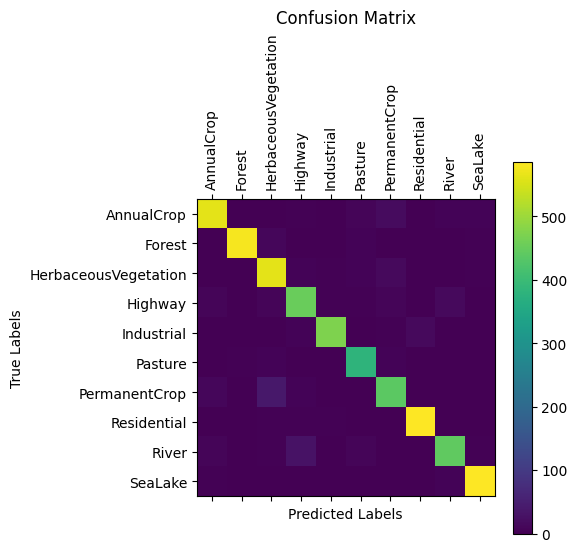

In [41]:
precision_recall_f1_value(true_labels, predicted_labels, ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"],"macro")